# Réflexions autour du voyage de commerce (TSP)

Le [problème du voyageur de commerce](http://fr.wikipedia.org/wiki/Probl%C3%A8me_du_voyageur_de_commerce) consiste à trouver le plus court chemin passant par toutes les villes. On parle aussi de [circuit hamiltonien](http://en.wikipedia.org/wiki/Hamiltonian_path) qui consiste à trouver le plus court chemin passant par tous les noeuds d'un graphe. Ce problème est [NP-complet](http://fr.wikipedia.org/wiki/Probl%C3%A8me_NP-complet) à savoir qu'il n'existe pas d'algorithme qui permette de trouver la solution avec un coût polynômiale. C'est aussi un problème différent du [plus court chemin dans un graphe](http://fr.wikipedia.org/wiki/Probl%C3%A8mes_de_cheminement) qui consiste à trouver le plus court chemin reliant deux noeuds d'un graphe (mais pas forcément tous les noeuds de ce graphe).

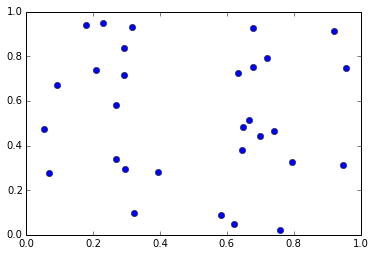

In [24]:
import random
n = 30
x = [ random.random() for _ in range(n) ]
y = [ random.random() for _ in range(n) ]
import matplotlib.pyplot as plt
plt.plot(x,y,"o")

Un parcours aléatoire de tous les noeuds de graphe donnera quelque chose de très éloigné de la solution optimale :

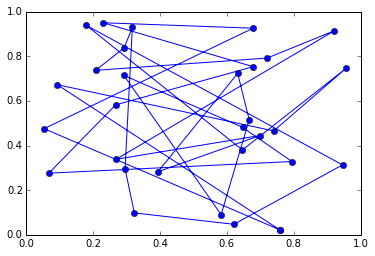

In [25]:
plt.plot(x + [ x[0] ], y + [ y[0] ], "o-")

La première constation est que le chemin ne peut pas être optimal car des arcs se croisent. On en déduit qu'une façon d'améliorer ce chemin est de _décroiser_ certaines parties. On peut par exemple choisir deux points au hasard, retourner la partie du chemin au milieu de ces deux points et voir si la longueur du chemin s'en trouve diminuée. On peut également parcourir toutes les paires de noeuds possibles. C'est ce qui est implémenté ci-dessous.

longueur initiale 9.088214152577255
iteration 2 d= 9.088214152577255
iteration 3 d= 1.8810860903995525
iteration 4 d= 1.4267273563131075
iteration

 5 d= 1.294543808915691
iteration 6 d= 0.9886582784000091
iteration 7 d= 0.8902961135577419
longueur min 0.8902961135577419


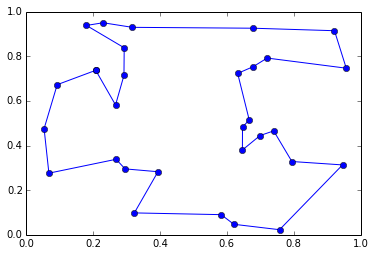

In [55]:
def longueur (x,y, ordre):
    i = ordre[-1]
    x0,y0 = x[i], y[i]
    d = 0
    for o in ordre:
        x1,y1 = x[o], y[o]
        d += (x0-x1)**2 + (y0-y1)**2
        x0,y0 = x1,y1
    return d

ordre = list(range(len(x)))
print("longueur initiale", longueur(x,y,ordre))

def permutation(x,y,ordre):
    d  = longueur(x,y,ordre)
    d0 = d+1
    it = 1
    while d < d0 :
        it += 1
        print("iteration",it, "d=",d)
        d0 = d
        for i in range(0,len(ordre)-1) :
            for j in range(i+2,len(ordre)):
                r = ordre[i:j].copy()
                r.reverse()
                ordre2 = ordre[:i] + r + ordre[j:]
                t = longueur(x,y,ordre2)
                if t < d :
                    d = t
                    ordre = ordre2
    return ordre

ordre = permutation (x,y,list(range(len(x))))
print("longueur min", longueur(x,y,ordre))
xo = [ x[o] for o in ordre + [ordre[0]]]
yo = [ y[o] for o in ordre + [ordre[0]]]
plt.plot(xo,yo, "o-")

Voilà qui est mieux. Maintenant, supposons que nous faisons une erreur lors du calcul de la distance : nous oublions le dernier arc qui boucle le chemin du dernier noeud au premier.

longueur initiale 8.224935150348868
iteration 2 d= 8.224935150348868
iteration 3 d= 1.4864813285014096
iteration

 4 d= 0.8977401460581786
iteration 5 d= 0.8363214570582255
iteration 6 d= 0.8112951461233574
longueur min

 0.8112951461233574


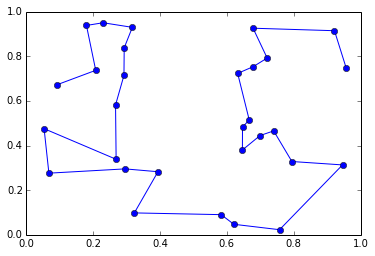

In [33]:
def longueur (x,y, ordre):
    # on change cette fonction
    d = 0
    for i in range(1,len(ordre)):
        n = ordre[i-1]
        o = ordre[i]
        x0,y0 = x[n], y[n]
        x1,y1 = x[o], y[o]
        d += (x0-x1)**2 + (y0-y1)**2
    return d

ordre = list(range(len(x)))
print("longueur initiale", longueur(x,y,ordre))

ordre = permutation (x,y,list(range(len(x))))
print("longueur min", longueur(x,y,ordre))
xo = [ x[o] for o in ordre]
yo = [ y[o] for o in ordre]
plt.plot(xo,yo, "o-")

Jusque ici, tout concorde. Le chemin est plus court en ce sens qu'il oublie délibérément l'arc de bouclage que l'algorithme a tendance à choisir grand. Pour gagner du temps de calcul, un développeur se dit que le noeud de départ peut être constant. Après tout, le chemin est une boucle, elle passera toujours par le premier noeud. Qu'il soit en première position ne change rien et puis inverser une moitié, c'est équivalent à inverser l'autre moitié. On fait donc juste une modification :

longueur initiale 9.088214152577255
iteration 2 d= 9.088214152577255 ordre[0] 0
iteration 3 d= 2.5487629282495905 ordre[0] 0
iteration 4 d= 2.0525351013235587 ordre[0] 0
iteration 5 d= 1.9682052771032004 ordre[0] 0
iteration

 6 d= 1.9626694831332183 ordre[0] 0
iteration 7 d= 1.9331541936977308 ordre[0] 0
longueur min 1.9331541936977308


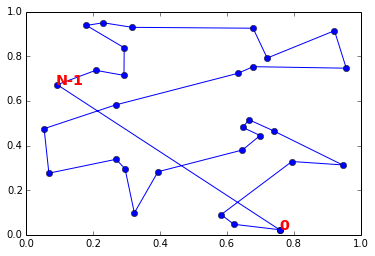

In [60]:
def longueur (x,y, ordre):
    i = ordre[-1]
    x0,y0 = x[i], y[i]
    d = 0
    for o in ordre:
        x1,y1 = x[o], y[o]
        d += (x0-x1)**2 + (y0-y1)**2
        x0,y0 = x1,y1
    return d

ordre = list(range(len(x)))
print("longueur initiale", longueur(x,y,ordre))

def permutation(x,y,ordre):
    d  = longueur(x,y,ordre)
    d0 = d+1
    it = 1
    while d < d0 :
        it += 1
        print("iteration",it, "d=",d, "ordre[0]", ordre[0])
        d0 = d
        for i in range(1,len(ordre)-1) :  # on part de 1 et plus de 0, on est sûr que le premier noeud ne bouge pas
            for j in range(i+2,len(ordre)):
                r = ordre[i:j].copy()
                r.reverse()
                ordre2 = ordre[:i] + r + ordre[j:]
                t = longueur(x,y,ordre2)
                if t < d :
                    d = t
                    ordre = ordre2
    return ordre

ordre = permutation (x,y,list(range(len(x))))
print("longueur min", longueur(x,y,ordre))
xo = [ x[o] for o in ordre + [ordre[0]]]
yo = [ y[o] for o in ordre + [ordre[0]]]
plt.plot(xo,yo, "o-")
plt.text(xo[0],yo[0],"0",color="r",weight="bold",size="x-large")
plt.text(xo[-2],yo[-2],"N-1",color="r",weight="bold",size="x-large")

Le résultat attendu n'est pas celui qu'on observe. Est-ce une erreur d'implémentation ou une erreur de raisonnement ? J'étais pourtant sûr que mon raisonnement était correct et j'aurais tort d'en douter. C'est une erreur d'implémentation. Lorsqu'on``for j in range(i+2,len(ordre)):`` et  ``r = ordre[i:j].copy()``, on écrit que ``j`` va de ``i+2`` inclus à ``len(ordre)`` exclu. Puis lorsqu'on écrit ``ordre[i:j]``, l'indice ``j`` est exclu ! Autrement dit, dans cette implémentation, le premier noeud et le dernier noeud ne bougeront jamais ! On s'empresse de corriger cela.

longueur initiale 9.088214152577255
iteration 2 d= 9.088214152577255 ordre[0] 0
iteration 3 d= 2.15274032488533 ordre[0] 0
iteration 4 d= 1.5871321718676845 ordre[0] 0
iteration 5 d= 1.4761768065688674 ordre[0] 0
iteration

 6 d= 1.305681395064649 ordre[0] 0
iteration 7 d= 1.1729692207112679 ordre[0] 0
iteration 8 d= 1.1696656744721234 ordre[0] 0
iteration 9 d= 1.0944778856037314 ordre[0] 0
longueur min

 1.0944778856037314


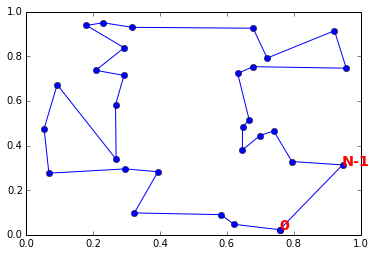

In [61]:
ordre = list(range(len(x)))
print("longueur initiale", longueur(x,y,ordre))

def permutation(x,y,ordre):
    d  = longueur(x,y,ordre)
    d0 = d+1
    it = 1
    while d < d0 :
        it += 1
        print("iteration",it, "d=",d, "ordre[0]", ordre[0])
        d0 = d
        for i in range(1,len(ordre)-1) :  # on part de 1 et plus de 0, on est sûr que le premier noeud ne bouge pas
            for j in range(i+2,len(ordre)+ 1):  # correction !
                r = ordre[i:j].copy()
                r.reverse()
                ordre2 = ordre[:i] + r + ordre[j:]
                t = longueur(x,y,ordre2)
                if t < d :
                    d = t
                    ordre = ordre2
    return ordre

ordre = permutation (x,y,list(range(len(x))))
print("longueur min", longueur(x,y,ordre))
xo = [ x[o] for o in ordre + [ordre[0]]]
yo = [ y[o] for o in ordre + [ordre[0]]]
plt.plot(xo,yo, "o-")
plt.text(xo[0],yo[0],"0",color="r",weight="bold",size="x-large")
plt.text(xo[-2],yo[-2],"N-1",color="r",weight="bold",size="x-large")

Pas parfait mais conforme à nos attentes (les miennes en tout cas) ! Soit dit en passant, la première version de l'algorithme laissait déjà le dernier noeud inchangé. 

La solution n'est pas parfaite en ce sens que visuellement, on voit que certaines partie du chemin pourraient être facilement améliorées. Mais si la solution était parfaite en toute circonstance, nous aurions trouvé un algorithme à temps polynômial ce qui est impossible. Dans notre cas, l'algorithme produit toujours la même solution car il parcourt les noeuds toujours dans le même sens. Un peu d'aléa devrait l'aider à trouver de meilleures solutions après quelques essais.

longueur initiale 9.088214152577255
iteration 2 d= 9.088214152577255 ordre[0] 0
iteration 3 d= 2.0752331652833953 ordre[0] 0
iteration 4 d= 1.5498126598925794 ordre[0] 0
iteration

 5 d= 1.0632204732444923 ordre[0] 0
iteration 6 d= 0.9586894082016447 ordre[0] 0
longueur min 0.9586894082016447


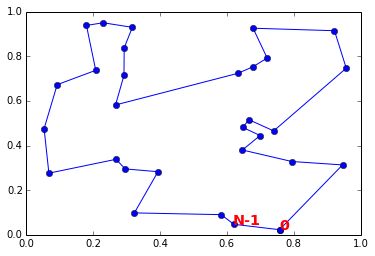

In [70]:
ordre = list(range(len(x)))
print("longueur initiale", longueur(x,y,ordre))

def permutation_rnd(x,y,ordre):
    d  = longueur(x,y,ordre)
    d0 = d+1
    it = 1
    while d < d0 :
        it += 1
        print("iteration",it, "d=",d, "ordre[0]", ordre[0])
        d0 = d
        for i in range(1,len(ordre)-1) :  
            for j in range(i+2,len(ordre)+ 1): 
                k = random.randint(1,len(ordre)-1)
                l = random.randint(k+1,len(ordre))
                r = ordre[k:l].copy()
                r.reverse()
                ordre2 = ordre[:k] + r + ordre[l:]
                t = longueur(x,y,ordre2)
                if t < d :
                    d = t
                    ordre = ordre2
    return ordre

ordre = permutation_rnd (x,y,list(range(len(x))))
print("longueur min", longueur(x,y,ordre))
xo = [ x[o] for o in ordre + [ordre[0]]]
yo = [ y[o] for o in ordre + [ordre[0]]]
plt.plot(xo,yo, "o-")
plt.text(xo[0],yo[0],"0",color="r",weight="bold",size="x-large")
plt.text(xo[-2],yo[-2],"N-1",color="r",weight="bold",size="x-large")

Ca a l'air de marcher un peu mieux mais quelques aberrations car l'aléatoire n'est pas un parcours systématique de toutes les pairs. Par conséquent, il peut rester des croisements :

iteration 2 d= 9.088214152577255 ordre[0] 0
iteration 3 d= 2.2142449917653977 ordre[0] 0
iteration

 4 d= 1.5041710703267277 ordre[0] 0
iteration 5 d= 1.3132407450526207 ordre[0] 0
iteration 6 d= 1.172238044178559 ordre[0] 0
iteration

 7 d= 1.1522114915981128 ordre[0] 0
longueur min 1.1522114915981128


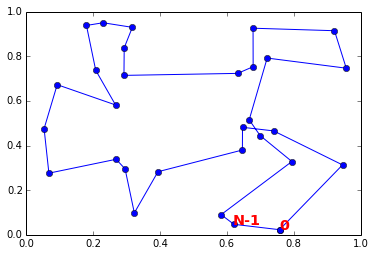

In [76]:
ordre = permutation_rnd (x,y,list(range(len(x))))
print("longueur min", longueur(x,y,ordre))
xo = [ x[o] for o in ordre + [ordre[0]]]
yo = [ y[o] for o in ordre + [ordre[0]]]
plt.plot(xo,yo, "o-")
plt.text(xo[0],yo[0],"0",color="r",weight="bold",size="x-large")
plt.text(xo[-2],yo[-2],"N-1",color="r",weight="bold",size="x-large")

Pour éviter cela, on peut imposer un nombre d'itérations minimum et recommencer plusieurs à partir d'ordre initiaux aléatoires :

longueur initiale 9.088214152577255
iteration 0 d= 9.088214152577255
iteration

 1 d= 0.9257857251290083
iteration

 2 d= 0.9257857251290083
iteration

 3 d= 0.9257857251290083
iteration

 4 d= 0.9257857251290083
iteration

 5 d= 0.9257857251290083
iteration

 6 d= 0.9257857251290083
iteration

 7 d= 0.9257857251290083
iteration

 8 d= 0.9257857251290083
iteration

 9 d= 0.9257857251290083
iteration

 10 d= 0.9257857251290083
iteration

 11 d= 0.9257857251290083
iteration

 12 d= 0.9257857251290083
iteration

 13 d= 0.9257857251290083
iteration

 14 d= 0.9257857251290083
iteration

 15 d= 0.890296113557742
iteration

 16 d= 0.890296113557742
iteration

 17 d= 0.890296113557742
iteration

 18 d= 0.890296113557742
iteration

 19 d= 0.890296113557742
longueur min

 0.890296113557742


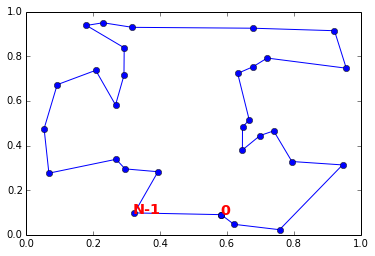

In [85]:
ordre = list(range(len(x)))
print("longueur initiale", longueur(x,y,ordre))

def permutation_rnd(x,y,ordre,miniter):
    d  = longueur(x,y,ordre)
    d0 = d+1
    it = 1
    while d < d0 or it < miniter :
        it += 1
        d0 = d
        for i in range(1,len(ordre)-1) :  
            for j in range(i+2,len(ordre)+ 1): 
                k = random.randint(1,len(ordre)-1)
                l = random.randint(k+1,len(ordre))
                r = ordre[k:l].copy()
                r.reverse()
                ordre2 = ordre[:k] + r + ordre[l:]
                t = longueur(x,y,ordre2)
                if t < d :
                    d = t
                    ordre = ordre2
    return ordre

def n_permutation(x,y, miniter):
    ordre = list(range(len(x)))
    bordre = ordre.copy()
    d0 = longueur(x,y,ordre)
    for i in range(0,20):
        print("iteration",i, "d=",d0)
        random.shuffle(ordre)
        ordre = permutation_rnd (x,y,ordre, 20)
        d = longueur(x,y,ordre)
        if d < d0 :
            d0 = d
            bordre = ordre.copy()
    return bordre

ordre = n_permutation (x,y, 20)
print("longueur min", longueur(x,y,ordre))
xo = [ x[o] for o in ordre + [ordre[0]]]
yo = [ y[o] for o in ordre + [ordre[0]]]
plt.plot(xo,yo, "o-")
plt.text(xo[0],yo[0],"0",color="r",weight="bold",size="x-large")
plt.text(xo[-2],yo[-2],"N-1",color="r",weight="bold",size="x-large")

C'est mieux.